In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
# # Simulated annealing algorithm implementation
# def simulated_annealing(distance_matrix, T_start, alpha, stopping_T):
#     # Calculate the total distance of the route
#     def total_distance(route):
#         return sum(distance_matrix[route[i], route[(i + 1) % len(route)]] for i in range(len(route)))

#     n = len(distance_matrix)
#     current_route = list(np.random.permutation(n))  # Initialize with a random permutation of cities
#     current_distance = total_distance(current_route)
#     T = T_start

#     # Simulated annealing process
#     while T > stopping_T:
#         i, j = random.sample(range(n), 2)  # Choose two random cities to swap
#         new_route = current_route[:]
#         new_route[i], new_route[j] = new_route[j], new_route[i]
#         new_distance = total_distance(new_route)

#         # Decide whether to accept the new route
#         if new_distance < current_distance or np.exp((current_distance - new_distance) / T) > np.random.rand():
#             current_route = new_route
#             current_distance = new_distance

#         T *= alpha  # Decrease the temperature

#     return current_route, current_distance

In [3]:
# # Read the CSV file
# file_path = '/Users/liyunxuan/Desktop/SS/cost.csv'
# distance_matrix = pd.read_csv(file_path, header=None).values

In [4]:
# # Set parameters
# T_start = 1000  # Initial temperature
# alpha = 0.995  # Cooling rate
# stopping_T = 1e-8  # Stopping temperature

In [5]:
# # Execute the simulated annealing algorithm
# best_route, best_distance = simulated_annealing(distance_matrix, T_start, alpha, stopping_T)


# print("Best route found:", best_route)
# print("Total distance of the best route:", best_distance)


In [6]:
# # Plot the resulting route in the plane
# def plot_route_in_plane(distance_matrix, route):
#     n = len(route)
#     plt.figure(figsize=(10, 6))
#     for i in range(n):
#         for j in range(i+1, n):
#             plt.plot([route[i], route[j]], [route[(i + 1) % n], route[(j + 1) % n]], 'bo-')
#     plt.xlabel('Station Index')
#     plt.ylabel('Station Index')
#     plt.title('Traveling Salesman Problem - Simulated Annealing')
#     plt.show()

In [7]:
# # Debug with stations on a circle
# def plot_route_on_circle(distance_matrix, route):
#     n = len(route)
#     angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
#     x = np.cos(angles)
#     y = np.sin(angles)
    
#     route_coords = np.array([x, y]).T[route]
#     plt.figure(figsize=(10, 6))
#     plt.plot(route_coords[:, 0], route_coords[:, 1], 'o-', label='Route')
#     plt.plot([route_coords[-1, 0], route_coords[0, 0]], [route_coords[-1, 1], route_coords[0, 1]], 'o-')
#     for i, txt in enumerate(route):
#         plt.annotate(txt, (route_coords[i, 0], route_coords[i, 1]))
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Traveling Salesman Problem - Simulated Annealing')
#     plt.legend()
#     plt.show()

In [8]:

# # Plot the resulting route in the plane
# plot_route_in_plane(distance_matrix, best_route)

# # Debug with stations on a circle
# plot_route_on_circle(distance_matrix, best_route)

Best route found: [15, 5, 11, 17, 6, 16, 10, 19, 2, 12, 3, 0, 1, 8, 13, 14, 18, 7, 4, 9]
Total distance of the best route: 856


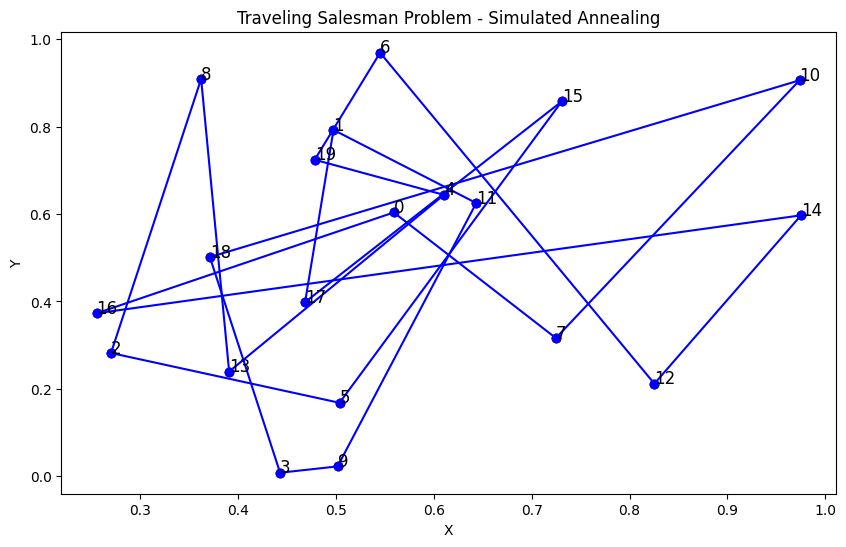

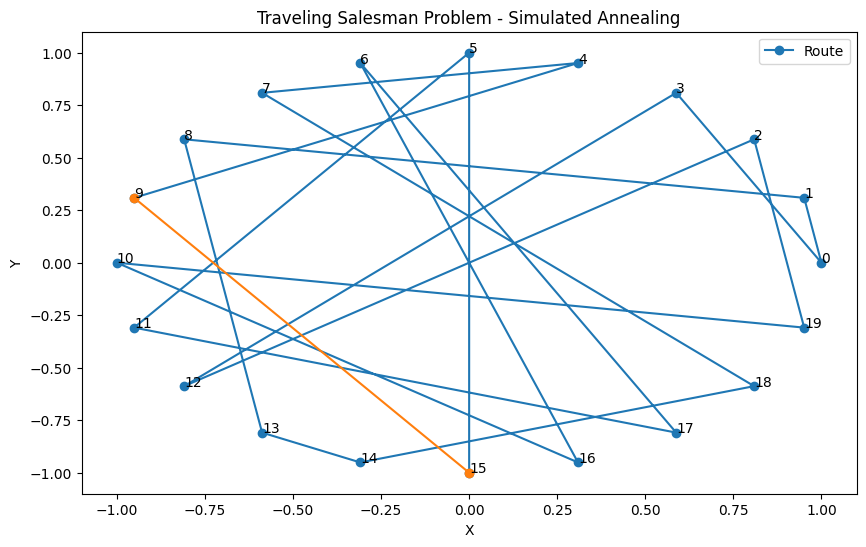

In [11]:


# Simulated annealing algorithm implementation
def simulated_annealing(distance_matrix, T_start, alpha, stopping_T):
    def total_distance(route):
        return sum(distance_matrix[route[i], route[(i + 1) % len(route)]] for i in range(len(route)))

    n = len(distance_matrix)
    current_route = list(np.random.permutation(n))
    current_distance = total_distance(current_route)
    T = T_start

    while T > stopping_T:
        i, j = random.sample(range(n), 2)
        new_route = current_route[:]
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_distance = total_distance(new_route)

        if new_distance < current_distance or np.exp((current_distance - new_distance) / T) > np.random.rand():
            current_route = new_route
            current_distance = new_distance

        T *= alpha

    return current_route, current_distance

# Read the CSV file
file_path = '/Users/liyunxuan/Desktop/SS/cost.csv' 
distance_matrix = pd.read_csv(file_path, header=None).values

# Set parameters
T_start = 1000  # Initial temperature
alpha = 0.995  # Cooling rate
stopping_T = 1e-8  # Stopping temperature

# Execute the simulated annealing algorithm
best_route, best_distance = simulated_annealing(distance_matrix, T_start, alpha, stopping_T)

print("Best route found:", best_route)
print("Total distance of the best route:", best_distance)

# Plot the resulting route in the plane
def plot_route_in_plane(distance_matrix, route):
    n = len(route)
    coordinates = np.random.rand(n, 2)  # Generate random coordinates for n stations

    plt.figure(figsize=(10, 6))
    for i in range(n):
        plt.plot([coordinates[route[i], 0], coordinates[route[(i + 1) % n], 0]], 
                 [coordinates[route[i], 1], coordinates[route[(i + 1) % n], 1]], 'bo-')
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red')
    for i in range(n):
        plt.text(coordinates[i, 0], coordinates[i, 1], str(route[i]), fontsize=12)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Traveling Salesman Problem - Simulated Annealing')
    plt.show()

# Debug with stations on a circle
def plot_route_on_circle(route):
    n = len(route)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x = np.cos(angles)
    y = np.sin(angles)

    route_coords = np.array([x, y]).T[route]
    plt.figure(figsize=(10, 6))
    plt.plot(route_coords[:, 0], route_coords[:, 1], 'o-', label='Route')
    plt.plot([route_coords[-1, 0], route_coords[0, 0]], [route_coords[-1, 1], route_coords[0, 1]], 'o-')
    for i, txt in enumerate(route):
        plt.annotate(txt, (route_coords[i, 0], route_coords[i, 1]))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Traveling Salesman Problem - Simulated Annealing')
    plt.legend()
    plt.show()

# Plot the resulting route in the plane
plot_route_in_plane(distance_matrix, best_route)

# Debug with stations on a circle
plot_route_on_circle(best_route)
